In [9]:
import pandas as pd

df = pd.read_csv("enriched_forage_dataset.csv")

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type_Animal                   35000 non-null  object 
 1   Race                          35000 non-null  object 
 2   Age_Stade_Physiologique       35000 non-null  object 
 3   Objectif_Animal               35000 non-null  object 
 4   Conditions_Climatiques        35000 non-null  object 
 5   Besoins_UFL                   35000 non-null  float64
 6   Besoins_PDIN                  35000 non-null  float64
 7   Besoins_PDIE                  35000 non-null  float64
 8   RMIC_Seuil                    35000 non-null  float64
 9   Description_Fourrage          35000 non-null  object 
 10  Energie_KCAL                  35000 non-null  float64
 11  Proteines_G                   35000 non-null  float64
 12  Fibres_G                      35000 non-null  float64
 13  M

In [11]:
print(df.head())

  Type_Animal       Race Age_Stade_Physiologique  Objectif_Animal  \
0      Caprin     Alpine               Gestation  Production Lait   
1       Bovin  Limousine               Lactation  Production Lait   
2       Bovin   Holstein               Lactation  Production Lait   
3      Caprin     Alpine           Engraissement    Engraissement   
4      Caprin     Saanen               Lactation  Production Lait   

  Conditions_Climatiques  Besoins_UFL  Besoins_PDIN  Besoins_PDIE  RMIC_Seuil  \
0                Tempéré        0.978          97.8         120.3        11.7   
1                 Humide        2.653         245.7         280.1        15.5   
2                Tempéré        2.672         247.4         282.0        17.5   
3                Tempéré        1.135          91.4         121.1        11.1   
4                 Humide        1.306         134.7         157.5         8.2   

  Description_Fourrage  ...  PDIN_Fourrage  PDIE_Fourrage  Meets_Requirements  \
0    Ray_grass_an

In [12]:
print(df.isnull().sum())
print((df.isnull().sum() / len(df)) * 100)

Type_Animal                     0
Race                            0
Age_Stade_Physiologique         0
Objectif_Animal                 0
Conditions_Climatiques          0
Besoins_UFL                     0
Besoins_PDIN                    0
Besoins_PDIE                    0
RMIC_Seuil                      0
Description_Fourrage            0
Energie_KCAL                    0
Proteines_G                     0
Fibres_G                        0
Matiere_Seche_G                 0
UFL_Fourrage                    0
PDIN_Fourrage                   0
PDIE_Fourrage                   0
Meets_Requirements              0
Grass_vs_Legume                 0
Season_Type                     0
NDFD_30h                        0
TTNDFD                          0
Climate_Adjustment_Factor       0
Region_Suitability              0
Expected_Yield_Impact_lb_day    0
dtype: int64
Type_Animal                     0.0
Race                            0.0
Age_Stade_Physiologique         0.0
Objectif_Animal              

In [13]:
print(df.duplicated().sum())

0


📈 Descriptive Statistics:
        Besoins_UFL  Besoins_PDIN  Besoins_PDIE    RMIC_Seuil  Energie_KCAL  \
count  35000.000000  35000.000000  35000.000000  35000.000000  35000.000000   
mean       1.156576    104.566386    125.616349     13.354777   2317.596771   
std        0.406725     36.529716     41.085149      2.723078    417.761333   
min        0.525000     48.800000     60.000000      8.000000   1480.000000   
25%        0.850000     77.000000     94.400000     11.300000   2033.750000   
50%        1.081000     98.000000    119.500000     13.100000   2265.000000   
75%        1.374000    123.600000    147.900000     15.300000   2518.000000   
max        2.700000    250.000000    285.000000     23.200000   3840.000000   

        Proteines_G      Fibres_G  Matiere_Seche_G  UFL_Fourrage  \
count  35000.000000  35000.000000     35000.000000  35000.000000   
mean     136.527749    352.179277       890.869943      0.742913   
std       32.837460     65.477256        93.470530      0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


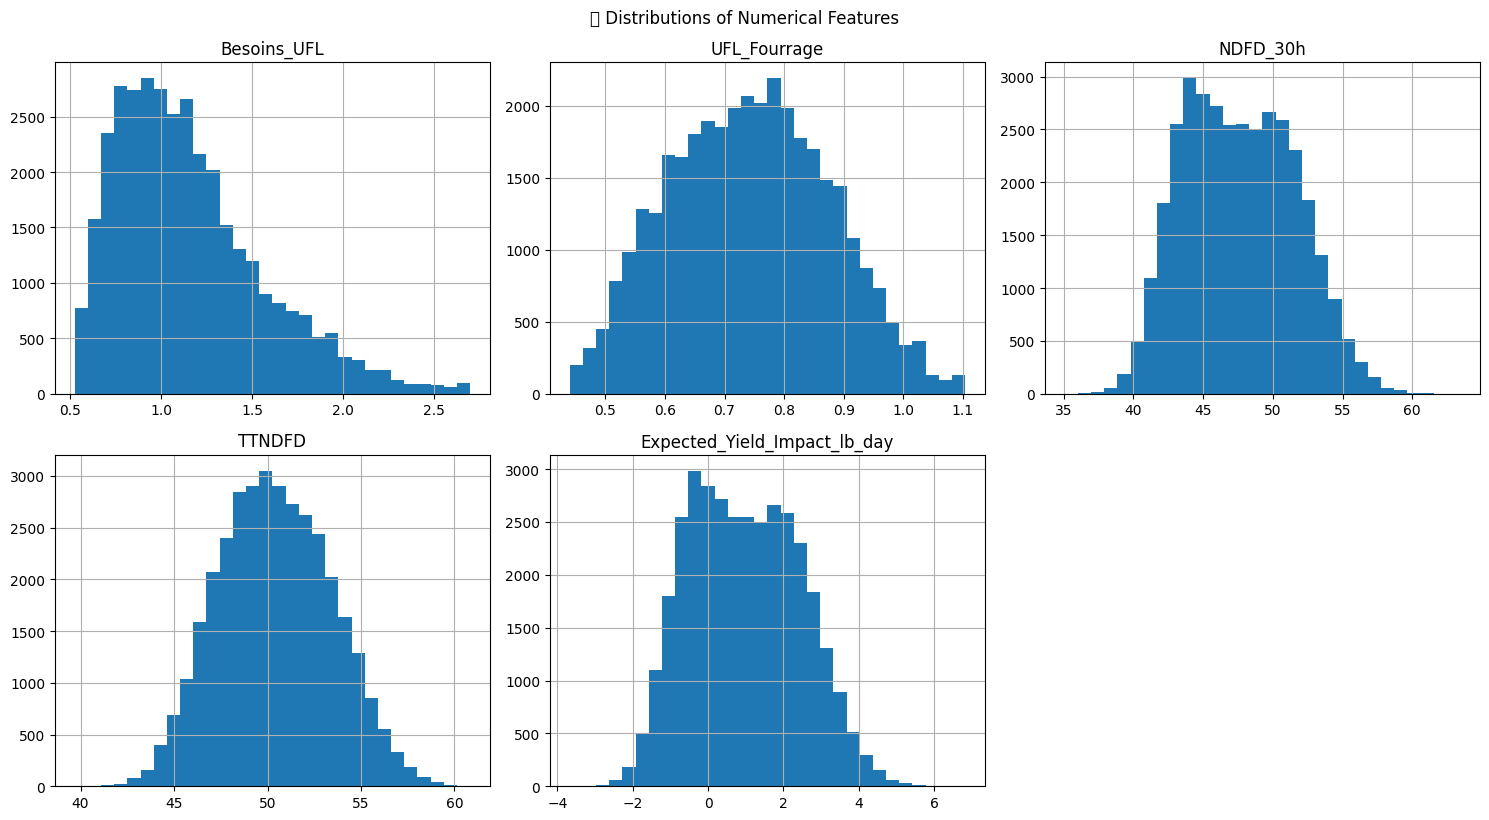

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 1. Summary statistics for numerical features
print("📈 Descriptive Statistics:")
print(df.describe())

# 🧮 2. Value counts for key categorical columns
print("\n📦 Forage Types:")
print(df['Description_Fourrage'].value_counts())

print("\n🐄 Animal Types:")
print(df['Type_Animal'].value_counts())

print("\n🎯 Production Goals:")
print(df['Objectif_Animal'].value_counts())

# 📉 3. Plot histograms for key numerical columns
numerical_cols = ['Besoins_UFL', 'UFL_Fourrage', 'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day']

df[numerical_cols].hist(bins=30, figsize=(15, 8), layout=(2, 3))
plt.tight_layout()
plt.suptitle("📊 Distributions of Numerical Features", y=1.02)
plt.show()


/tmp/ipython-input-15-2813641412.py:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


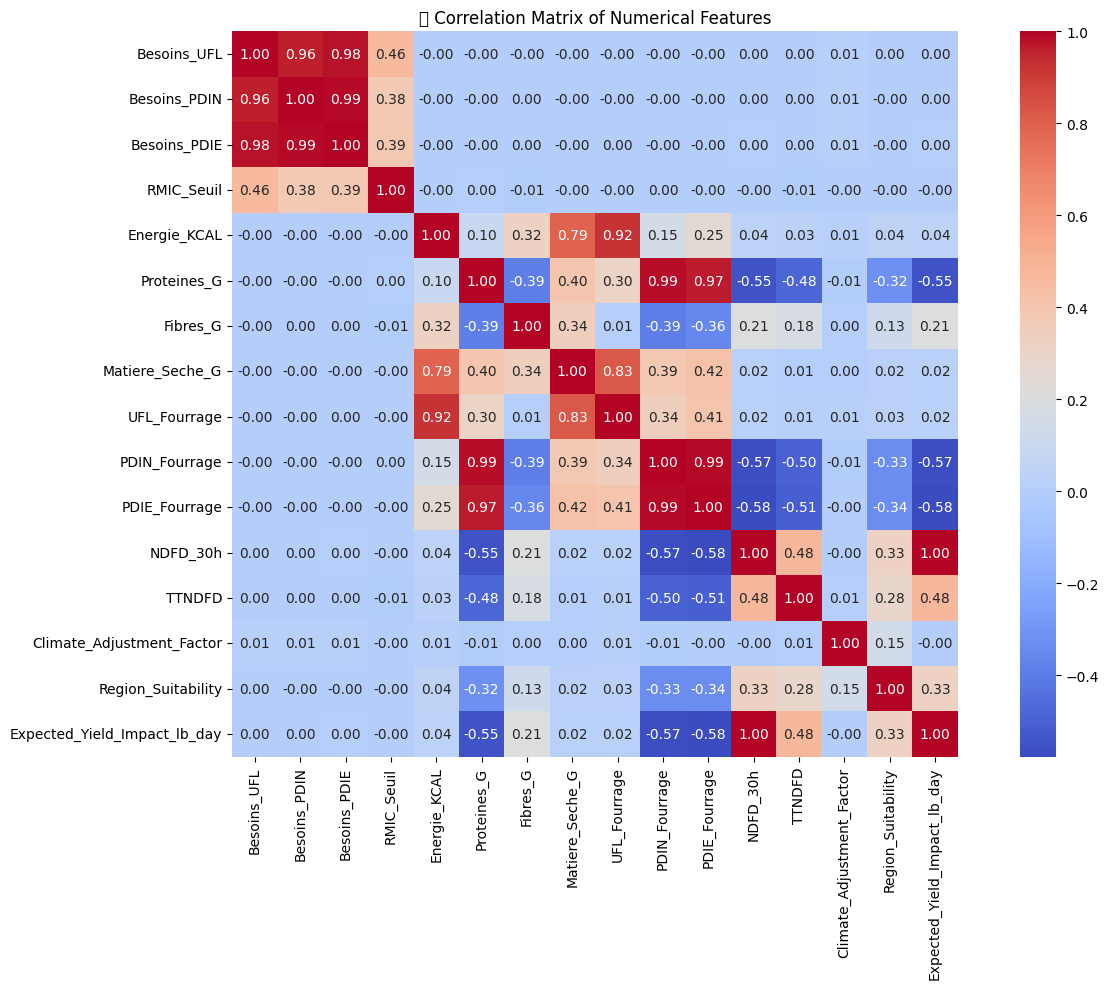

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔗 Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


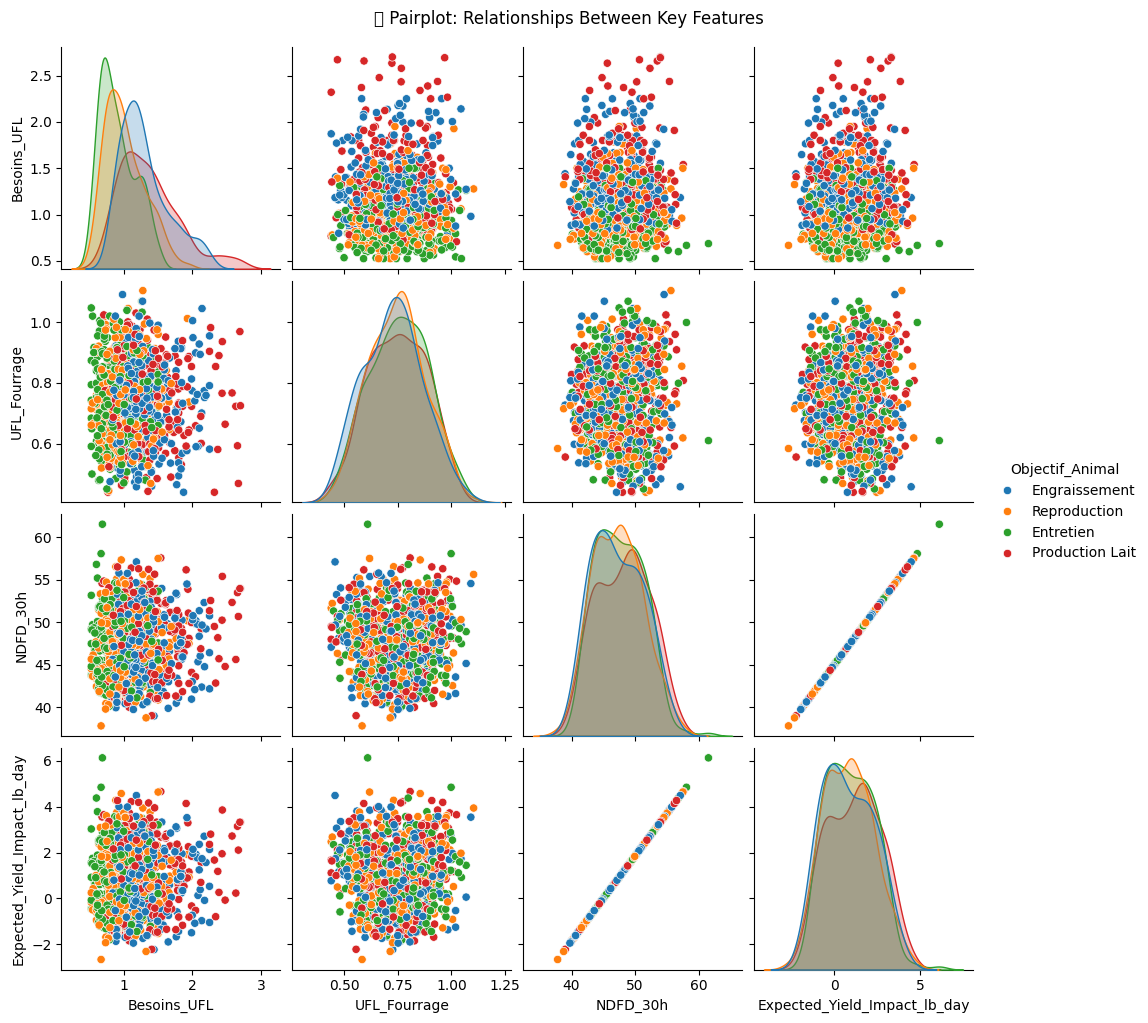

In [16]:
# You can use only a few key features to avoid heavy rendering
sample_df = df.sample(1000)  # reduce for performance

sns.pairplot(sample_df, vars=['Besoins_UFL', 'UFL_Fourrage', 'NDFD_30h', 'Expected_Yield_Impact_lb_day'], hue='Objectif_Animal')
plt.suptitle("🔍 Pairplot: Relationships Between Key Features", y=1.02)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


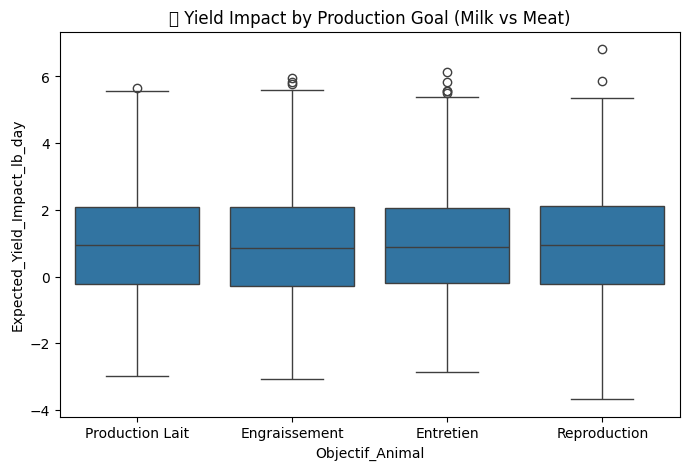

In [17]:
# Compare Expected Yield across production goals
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Objectif_Animal', y='Expected_Yield_Impact_lb_day')
plt.title("📦 Yield Impact by Production Goal (Milk vs Meat)")
plt.show()


In [18]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['Type_Animal', 'Race', 'Age_Stade_Physiologique', 'Objectif_Animal',
                    'Conditions_Climatiques', 'Description_Fourrage', 'Grass_vs_Legume',
                    'Season_Type']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show the new shape
print("✅ Encoded Data Shape:", df_encoded.shape)


✅ Encoded Data Shape: (35000, 45)


In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = ['Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE',
            'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage',
            'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day',
            'RMIC_Seuil', 'Climate_Adjustment_Factor', 'Region_Suitability']

# Apply scaling
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Preview
df_encoded[num_cols].head()


,Besoins_UFL,Besoins_PDIN,Besoins_PDIE,UFL_Fourrage,PDIN_Fourrage,PDIE_Fourrage,NDFD_30h,TTNDFD,Expected_Yield_Impact_lb_day,RMIC_Seuil,Climate_Adjustment_Factor,Region_Suitability
0,-0.439065,-0.185232,-0.129400,1.212543,0.215048,0.168657,0.977422,1.282167,0.977422,-0.607695,-0.708350,1.048087
1,3.679259,3.863584,3.760139,-1.173830,-0.733028,-0.817337,0.497635,1.870792,0.497635,0.787805,1.411732,1.048087
2,3.725974,3.910122,3.806385,1.003081,-1.419418,-1.103593,1.091498,0.811045,1.091498,1.522278,-0.708350,1.048087
3,-0.053049,-0.360435,-0.109928,-1.637639,-1.213501,-1.321693,1.752902,0.313359,1.752902,-0.828037,-0.708350,1.048087
4,0.367389,0.824919,0.776049,-1.839621,-1.183471,-1.258080,0.425182,-0.359132,0.425182,-1.893024,1.411732,1.048087


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🏷️ Set target and features
X = df_encoded.drop(columns=['Meets_Requirements'])  # Features
y = df_encoded['Meets_Requirements']  # Target

# 📦 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🧪 Make predictions
y_pred = model.predict(X_test)

# 📊 Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9888571428571429

📉 Confusion Matrix:
 [[4938   28]
 [  50 1984]]

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      4966
        True       0.99      0.98      0.98      2034

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [22]:
import pandas as pd
import numpy as np

def predict_best_forage(goal, climate, model, df_encoded, original_df, top_n=5):
    """
    Test your trained model by predicting the best forage for given goal and climate

    Parameters:
    - goal: e.g., "Production Lait", "Engraissement", etc.
    - climate: e.g., "Tempéré", "Sec", "Humide"
    - model: your trained RandomForest model
    - df_encoded: your encoded dataframe
    - original_df: your original dataframe
    - top_n: number of top forages to test

    Returns:
    - Best forage recommendation with confidence score
    """

    print(f"🤖 Testing ML Model for: {goal} in {climate} climate")
    print("=" * 60)

    # Get all available forages from your original data
    available_forages = original_df['Description_Fourrage'].unique()

    # Get feature columns (without target)
    feature_columns = df_encoded.drop(columns=['Meets_Requirements']).columns

    # Store results for all forages
    forage_predictions = []

    print(f"🔍 Testing {len(available_forages)} different forage types...")

    for forage in available_forages:
        try:
            # Create a test sample
            test_sample = pd.DataFrame(0, index=[0], columns=feature_columns)

            # Set the goal (one-hot encoded)
            goal_column = f'Objectif_Animal_{goal}'
            if goal_column in test_sample.columns:
                test_sample[goal_column] = 1
            else:
                continue  # Skip if goal not found

            # Set the climate (one-hot encoded)
            climate_column = f'Conditions_Climatiques_{climate}'
            if climate_column in test_sample.columns:
                test_sample[climate_column] = 1
            else:
                continue  # Skip if climate not found

            # Set the forage (one-hot encoded)
            forage_column = f'Description_Fourrage_{forage}'
            if forage_column in test_sample.columns:
                test_sample[forage_column] = 1
            else:
                continue  # Skip if forage not found

            # Set numeric features to mean values from training data
            numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
            numeric_columns = [col for col in numeric_columns if col != 'Meets_Requirements']

            for col in numeric_columns:
                if col in test_sample.columns:
                    test_sample[col] = df_encoded[col].mean()

            # Make prediction
            prediction = model.predict(test_sample)[0]
            prediction_proba = model.predict_proba(test_sample)[0]
            confidence = prediction_proba[1]  # Probability of being suitable (True)

            forage_predictions.append({
                'Forage': forage,
                'Predicted_Suitable': prediction,
                'Confidence_Score': round(confidence, 4),
                'Confidence_Percent': f"{confidence:.1%}"
            })

        except Exception as e:
            # Skip forages that cause errors
            continue

    # Convert to DataFrame and sort by confidence
    results_df = pd.DataFrame(forage_predictions)

    if results_df.empty:
        return "❌ No valid predictions could be made. Check your goal and climate values."

    # Sort by prediction (True first) then by confidence
    results_df = results_df.sort_values(['Predicted_Suitable', 'Confidence_Score'],
                                       ascending=[False, False])

    # Get recommended forages (predicted as suitable)
    recommended = results_df[results_df['Predicted_Suitable'] == True]

    # Display results
    print(f"\n🎯 ML MODEL PREDICTIONS:")
    print(f"Goal: {goal} | Climate: {climate}")
    print("-" * 40)

    if not recommended.empty:
        print(f"✅ RECOMMENDED FORAGES ({len(recommended)} found):")
        for i, (_, row) in enumerate(recommended.head(top_n).iterrows(), 1):
            print(f"  {i}. {row['Forage']} - Confidence: {row['Confidence_Percent']}")

        print(f"\n🏆 TOP RECOMMENDATION: {recommended.iloc[0]['Forage']}")
        print(f"   Confidence: {recommended.iloc[0]['Confidence_Percent']}")

    else:
        print("❌ No forages predicted as suitable by the ML model")
        print("\n⚠️ TOP ALTERNATIVES (highest confidence among non-recommended):")
        for i, (_, row) in enumerate(results_df.head(3).iterrows(), 1):
            print(f"  {i}. {row['Forage']} - Confidence: {row['Confidence_Percent']}")

    # Show summary statistics
    total_tested = len(results_df)
    total_recommended = len(recommended)
    avg_confidence = results_df['Confidence_Score'].mean()

    print(f"\n📊 SUMMARY:")
    print(f"   • Total forages tested: {total_tested}")
    print(f"   • Forages recommended: {total_recommended}")
    print(f"   • Average confidence: {avg_confidence:.1%}")
    print(f"   • Success rate: {total_recommended/total_tested:.1%}")

    return results_df

# Test your model with different scenarios
def test_multiple_scenarios(model, df_encoded, original_df):
    """
    Test your model with multiple goal/climate combinations
    """
    print("🧪 TESTING MULTIPLE SCENARIOS")
    print("=" * 50)

    # Define test scenarios
    test_scenarios = [
        ("Production Lait", "Tempéré"),
        ("Production Lait", "Sec"),
        ("Production Lait", "Humide"),
        ("Engraissement", "Tempéré"),
        ("Entretien", "Tempéré")
    ]

    for goal, climate in test_scenarios:
        print(f"\n{'='*60}")
        try:
            results = predict_best_forage(goal, climate, model, df_encoded, original_df, top_n=3)
            if isinstance(results, pd.DataFrame) and not results.empty:
                top_choice = results[results['Predicted_Suitable'] == True]
                if not top_choice.empty:
                    print(f"🎯 Best choice: {top_choice.iloc[0]['Forage']}")
        except Exception as e:
            print(f"❌ Error testing {goal} in {climate}: {e}")

# Quick single test function
def quick_forage_test(goal, climate, model, df_encoded, original_df):
    """
    Quick test - just return the top recommendation
    """
    results = predict_best_forage(goal, climate, model, df_encoded, original_df, top_n=1)

    if isinstance(results, pd.DataFrame) and not results.empty:
        recommended = results[results['Predicted_Suitable'] == True]
        if not recommended.empty:
            top_forage = recommended.iloc[0]
            return f"🏆 Recommended: {top_forage['Forage']} (Confidence: {top_forage['Confidence_Percent']})"
        else:
            top_alternative = results.iloc[0]
            return f"⚠️ Best alternative: {top_alternative['Forage']} (Confidence: {top_alternative['Confidence_Percent']})"
    else:
        return "❌ No prediction could be made"

In [27]:
original_df = df
# Test your trained model
print("🚀 TESTING YOUR TRAINED RANDOMFOREST MODEL")
print("=" * 60)

# Single test
results = predict_best_forage(
    goal="Production Lait",
    climate="Tempéré",
    model=model,
    df_encoded=df_encoded,
    original_df=original_df,  # Make sure you have this variable
    top_n=5
)

# Quick test
print(f"\n{quick_forage_test('Production Lait', 'Tempéré', model, df_encoded, original_df)}")
print(f"{quick_forage_test('Engraissement', 'Tempéré', model, df_encoded, original_df)}")
print(f"{quick_forage_test('Production Lait', 'Sec', model, df_encoded, original_df)}")

🚀 TESTING YOUR TRAINED RANDOMFOREST MODEL
🤖 Testing ML Model for: Production Lait in Tempéré climate
🔍 Testing 10 different forage types...

🎯 ML MODEL PREDICTIONS:
Goal: Production Lait | Climate: Tempéré
----------------------------------------
❌ No forages predicted as suitable by the ML model

⚠️ TOP ALTERNATIVES (highest confidence among non-recommended):
  1. Luzerne_1er_cycle - Confidence: 3.0%
  2. Ray_grass_anglais - Confidence: 2.0%
  3. Foin_prairie - Confidence: 0.0%

📊 SUMMARY:
   • Total forages tested: 9
   • Forages recommended: 0
   • Average confidence: 0.6%
   • Success rate: 0.0%
🤖 Testing ML Model for: Production Lait in Tempéré climate
🔍 Testing 10 different forage types...

🎯 ML MODEL PREDICTIONS:
Goal: Production Lait | Climate: Tempéré
----------------------------------------
❌ No forages predicted as suitable by the ML model

⚠️ TOP ALTERNATIVES (highest confidence among non-recommended):
  1. Luzerne_1er_cycle - Confidence: 3.0%
  2. Ray_grass_anglais - Confi

In [ ]:
import numpy as np
import pandas as pd

def recommend_forage(goal, climate, forage, model, reference_df, scaler):
    # Drop the target column if present
    if 'Meets_Requirements' in reference_df.columns:
        reference_df = reference_df.drop(columns=['Meets_Requirements'])

    # Create a dummy input based on the reference structure
    new_data = reference_df.iloc[0:1].copy()

    # Reset all values properly based on column types
    for col in new_data.columns:
        if new_data[col].dtype == 'bool':
            new_data[col] = False
        else:
            new_data[col] = 0

    # Set encoded inputs
    goal_col = 'Objectif_Animal_' + goal
    climate_col = 'Conditions_Climatiques_' + climate
    forage_col = 'Description_Fourrage_' + forage

    for col in [goal_col, climate_col, forage_col]:
        if col in new_data.columns:
            new_data[col] = True if new_data[col].dtype == 'bool' else 1
        else:
            return f"❌ Error: Column '{col}' not found. Check your spelling."

    # Set numeric features with mean values
    num_cols = ['Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE',
                'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage',
                'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day',
                'RMIC_Seuil', 'Climate_Adjustment_Factor', 'Region_Suitability']

    for col in num_cols:
        if col in new_data.columns:
            new_data[col] = reference_df[col].mean()

    # Scale numeric features only if they exist
    existing_num_cols = [col for col in num_cols if col in new_data.columns]
    if existing_num_cols:
        new_data[existing_num_cols] = scaler.transform(new_data[existing_num_cols])

    # Predict
    prediction = model.predict(new_data)[0]

    if prediction:
        return f"✅ Recommended: '{forage}' is suitable for goal '{goal}' in climate '{climate}'."
    else:
        return f"❌ Not Recommended: '{forage}' does NOT meet the needs for goal '{goal}' in climate '{climate}'."

In [ ]:
print(recommend_forage(
    goal="Production Lait",
    climate="Tempéré",
    forage="Ray_grass_anglais",
    model=model,
    reference_df=df_encoded,
    scaler=scaler
))


❌ Not Recommended: 'Ray_grass_anglais' does NOT meet the needs for goal 'Production Lait' in climate 'Tempéré'.


In [ ]:
print([col for col in df_encoded.columns if "Objectif_Animal" in col])
print([col for col in df_encoded.columns if "Conditions_Climatiques" in col])
print([col for col in df_encoded.columns if "Description_Fourrage" in col])


['Objectif_Animal_Entretien', 'Objectif_Animal_Production Lait', 'Objectif_Animal_Reproduction']
['Conditions_Climatiques_Sec', 'Conditions_Climatiques_Tempéré']
['Description_Fourrage_Ensilage_maïs', 'Description_Fourrage_Foin_graminées', 'Description_Fourrage_Foin_luzerne', 'Description_Fourrage_Foin_prairie', 'Description_Fourrage_Fétuque_élevée', 'Description_Fourrage_Luzerne_1er_cycle', 'Description_Fourrage_Luzerne_2eme_cycle', 'Description_Fourrage_Ray_grass_anglais', 'Description_Fourrage_Trèfle_violet']


In [ ]:
# Step 1: Create X from df_encoded WITHOUT target column
X = df_encoded.drop(columns=['Meets_Requirements'])
y = df_encoded['Meets_Requirements'].astype(int)

# Step 2: Fit model and scaler on X
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
numeric_cols = ['Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE',
                'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage',
                'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day',
                'RMIC_Seuil', 'Climate_Adjustment_Factor', 'Region_Suitability']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
print(recommend_forage(
    goal="Production Lait",
    climate="Tempéré",
    forage="Ray_grass_anglais",
    model=model,
    reference_df=X,  # Use encoded + clean data only
    scaler=scaler
))


❌ Not Recommended: 'Ray_grass_anglais' does NOT meet the needs for goal 'Production Lait' in climate 'Tempéré'.


In [12]:
import pandas as pd
import numpy as np

def suggest_best_forages(goal, climate, df, top_n=5):
    """
    Suggest the best forages based on goal and climate conditions.

    Parameters:
    - goal: Animal objective (e.g., "Production Lait")
    - climate: Climate conditions (e.g., "Tempéré")
    - df: Original dataframe with forage data
    - top_n: Number of top recommendations to return

    Returns:
    - String with recommendations or error message
    """

    # Validate inputs
    if goal not in df['Objectif_Animal'].unique():
        available_goals = df['Objectif_Animal'].unique()
        return f"❌ Goal '{goal}' not found. Available goals: {list(available_goals)}"

    if climate not in df['Conditions_Climatiques'].unique():
        available_climates = df['Conditions_Climatiques'].unique()
        return f"❌ Climate '{climate}' not found. Available climates: {list(available_climates)}"

    # Step 1: Filter based on goal and climate
    filtered = df[
        (df['Objectif_Animal'] == goal) &
        (df['Conditions_Climatiques'] == climate)
    ]

    if filtered.empty:
        return f"❌ No data found for goal '{goal}' in climate '{climate}'."

    # Step 2: Filter only valid (meets requirements)
    suitable = filtered[filtered['Meets_Requirements'] == True]

    # Step 3: Count how many times each forage is suitable
    forage_counts = suitable['Description_Fourrage'].value_counts().head(top_n)

    # Step 4: Return recommendations with counts
    if forage_counts.empty:
        return f"❌ No suitable forage found for goal '{goal}' in climate '{climate}'."
    else:
        recommendations = []
        for forage, count in forage_counts.items():
            recommendations.append(f"- {forage} (appears {count} times)")

        return f"✅ Top {len(forage_counts)} recommended forages for '{goal}' in '{climate}':\n" + "\n".join(recommendations)

# Load your data (make sure the file path is correct)
try:
    original_df = pd.read_csv("enriched_forage_dataset.csv")
    print("✅ Data loaded successfully!")
    print(f"Dataset shape: {original_df.shape}")
    print(f"Columns: {list(original_df.columns)}")

    # Test the function
    result = suggest_best_forages(
        goal="Production Lait",
        climate="Tempéré",
        df=original_df
    )
    print("\n" + result)

except FileNotFoundError:
    print("❌ File 'enriched_forage_dataset.csv' not found. Please check the file path.")
except Exception as e:
    print(f"❌ Error loading data: {e}")


✅ Data loaded successfully!
Dataset shape: (15307, 25)
Columns: ['Type_Animal', 'Race', 'Age_Stade_Physiologique', 'Objectif_Animal', 'Conditions_Climatiques', 'Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE', 'RMIC_Seuil', 'Description_Fourrage', 'Energie_KCAL', 'Proteines_G', 'Fibres_G', 'Matiere_Seche_G', 'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage', 'Meets_Requirements', 'Grass_vs_Legume', 'Season_Type', 'NDFD_30h', 'TTNDFD', 'Climate_Adjustment_Factor', 'Region_Suitability', 'Expected_Yield_Impact_lb_day']

✅ Top 5 recommended forages for 'Production Lait' in 'Tempéré':
- Luzerne_1er_cycle (appears 42 times)
- Luzerne_2eme_cycle (appears 24 times)
- Trèfle_violet (appears 18 times)
- Foin_luzerne (appears 17 times)
- Ray_grass_anglais (appears 17 times)


In [13]:
def suggest_best_forages_detailed(goal, climate, df, top_n=5):
    """
    Enhanced version with nutritional information
    """

    # Filter based on goal and climate
    filtered = df[
        (df['Objectif_Animal'] == goal) &
        (df['Conditions_Climatiques'] == climate)
    ]

    if filtered.empty:
        return f"❌ No data found for goal '{goal}' in climate '{climate}'."

    # Filter only suitable forages
    suitable = filtered[filtered['Meets_Requirements'] == True]

    if suitable.empty:
        return f"❌ No suitable forage found for goal '{goal}' in climate '{climate}'."

    # Get top forages with nutritional info
    forage_stats = suitable.groupby('Description_Fourrage').agg({
        'UFL_Fourrage': 'mean',
        'PDIN_Fourrage': 'mean',
        'PDIE_Fourrage': 'mean',
        'Expected_Yield_Impact_lb_day': 'mean'
    }).round(2)

    # Count occurrences
    forage_counts = suitable['Description_Fourrage'].value_counts()

    # Combine data
    result_df = pd.DataFrame({
        'Count': forage_counts,
        'Avg_UFL': forage_stats['UFL_Fourrage'],
        'Avg_PDIN': forage_stats['PDIN_Fourrage'],
        'Avg_PDIE': forage_stats['PDIE_Fourrage'],
        'Avg_Yield_Impact': forage_stats['Expected_Yield_Impact_lb_day']
    }).head(top_n)

    print(f"✅ Top {len(result_df)} recommended forages for '{goal}' in '{climate}':")
    print(result_df.to_string())

    return result_df

# Test the enhanced function
print("DETAILED ANALYSIS:")
detailed_results = suggest_best_forages_detailed("Production Lait", "Tempéré", original_df)

DETAILED ANALYSIS:
✅ Top 5 recommended forages for 'Production Lait' in 'Tempéré':
                      Count  Avg_UFL  Avg_PDIN  Avg_PDIE  Avg_Yield_Impact
Description_Fourrage                                                      
Ensilage_herbe           13     0.81     86.31     80.91              1.86
Ensilage_maïs             1     0.98     58.70     64.00              1.25
Foin_luzerne             17     0.71    103.22     97.79             -0.35
Foin_prairie              3     0.70     81.70     75.87              1.90
Fétuque_élevée            5     0.86     80.98     75.56              2.62


In [18]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class ForageRecommendationSystem:
    """
    Advanced Forage Recommendation System for Cattle
    Combines historical data analysis with ML predictions
    """

    def __init__(self, original_df, encoded_df=None, model=None, scaler=None):
        self.original_df = original_df
        self.encoded_df = encoded_df
        self.model = model
        self.scaler = scaler

    def suggest_best_forages_enhanced(self, goal, climate, top_n=10, include_nutrition=True):
        """
        Enhanced forage recommendation with nutritional analysis

        Parameters:
        - goal: Animal objective (e.g., "Production Lait")
        - climate: Climate conditions (e.g., "Tempéré")
        - top_n: Number of recommendations to return
        - include_nutrition: Whether to include nutritional analysis

        Returns:
        - Formatted recommendation string and DataFrame
        """

        # Validate inputs
        available_goals = self.original_df['Objectif_Animal'].unique()
        available_climates = self.original_df['Conditions_Climatiques'].unique()

        if goal not in available_goals:
            return f"❌ Goal '{goal}' not found. Available: {list(available_goals)}", pd.DataFrame()

        if climate not in available_climates:
            return f"❌ Climate '{climate}' not found. Available: {list(available_climates)}", pd.DataFrame()

        # Filter data
        filtered = self.original_df[
            (self.original_df['Objectif_Animal'] == goal) &
            (self.original_df['Conditions_Climatiques'] == climate)
        ]

        if filtered.empty:
            return f"❌ No data found for goal '{goal}' in climate '{climate}'.", pd.DataFrame()

        # Get suitable forages
        suitable = filtered[filtered['Meets_Requirements'] == True]

        if suitable.empty:
            return f"❌ No suitable forage found for goal '{goal}' in climate '{climate}'.", pd.DataFrame()

        # Calculate comprehensive statistics
        forage_stats = suitable.groupby('Description_Fourrage').agg({
            'Meets_Requirements': 'count',  # Total occurrences
            'UFL_Fourrage': ['mean', 'std'],
            'PDIN_Fourrage': ['mean', 'std'],
            'PDIE_Fourrage': ['mean', 'std'],
            'Expected_Yield_Impact_lb_day': ['mean', 'std'],
            'NDFD_30h': 'mean',
            'TTNDFD': 'mean'
        }).round(2)

        # Flatten column names
        forage_stats.columns = [
            'Success_Count', 'Avg_UFL', 'Std_UFL', 'Avg_PDIN', 'Std_PDIN',
            'Avg_PDIE', 'Std_PDIE', 'Avg_Yield_Impact', 'Std_Yield_Impact',
            'Avg_NDFD_30h', 'Avg_TTNDFD'
        ]

        # Calculate success rate
        total_attempts = filtered.groupby('Description_Fourrage').size()
        forage_stats['Total_Records'] = total_attempts
        forage_stats['Success_Rate'] = (forage_stats['Success_Count'] / forage_stats['Total_Records'] * 100).round(1)

        # Sort by success count and success rate
        forage_stats = forage_stats.sort_values(['Success_Count', 'Success_Rate'], ascending=[False, False])

        # Get top recommendations
        top_forages = forage_stats.head(top_n)

        # Format output
        output = self._format_recommendations(goal, climate, top_forages, include_nutrition)

        return output, top_forages

    def _format_recommendations(self, goal, climate, forage_stats, include_nutrition):
        """Format recommendations in a readable way"""

        output = f"🎯 FORAGE RECOMMENDATIONS\n"
        output += f"Goal: {goal} | Climate: {climate}\n"
        output += "=" * 60 + "\n\n"

        output += f"✅ TOP {len(forage_stats)} RECOMMENDED FORAGES:\n\n"

        for rank, (forage, stats) in enumerate(forage_stats.iterrows(), 1):
            output += f"{rank}. {forage}\n"
            output += f"   📊 Success: {stats['Success_Count']} times ({stats['Success_Rate']}% success rate)\n"

            if include_nutrition:
                output += f"   🌾 Nutrition: UFL={stats['Avg_UFL']}, PDIN={stats['Avg_PDIN']}, PDIE={stats['Avg_PDIE']}\n"
                output += f"   📈 Yield Impact: {stats['Avg_Yield_Impact']} lb/day\n"
                output += f"   🔬 Digestibility: NDFD={stats['Avg_NDFD_30h']}%, TTNDFD={stats['Avg_TTNDFD']}%\n"

            output += "\n"

        return output

    def compare_forages(self, goal, climate, forage_list):
        """
        Compare specific forages for a given goal and climate
        """
        comparison_data = []

        for forage in forage_list:
            forage_data = self.original_df[
                (self.original_df['Objectif_Animal'] == goal) &
                (self.original_df['Conditions_Climatiques'] == climate) &
                (self.original_df['Description_Fourrage'] == forage)
            ]

            if not forage_data.empty:
                suitable = forage_data[forage_data['Meets_Requirements'] == True]
                success_rate = len(suitable) / len(forage_data) * 100

                comparison_data.append({
                    'Forage': forage,
                    'Total_Records': len(forage_data),
                    'Successful': len(suitable),
                    'Success_Rate_%': round(success_rate, 1),
                    'Avg_UFL': round(forage_data['UFL_Fourrage'].mean(), 2),
                    'Avg_PDIN': round(forage_data['PDIN_Fourrage'].mean(), 2),
                    'Avg_PDIE': round(forage_data['PDIE_Fourrage'].mean(), 2),
                    'Avg_Yield_Impact': round(forage_data['Expected_Yield_Impact_lb_day'].mean(), 2)
                })

        comparison_df = pd.DataFrame(comparison_data)
        return comparison_df.sort_values('Success_Rate_%', ascending=False)

    def get_climate_analysis(self, goal):
        """
        Analyze forage performance across different climates for a specific goal
        """
        goal_data = self.original_df[self.original_df['Objectif_Animal'] == goal]

        climate_analysis = goal_data.groupby(['Conditions_Climatiques', 'Description_Fourrage']).agg({
            'Meets_Requirements': ['count', 'sum']
        }).round(2)

        climate_analysis.columns = ['Total_Records', 'Successful']
        climate_analysis['Success_Rate_%'] = (climate_analysis['Successful'] / climate_analysis['Total_Records'] * 100).round(1)

        return climate_analysis.reset_index().sort_values(['Conditions_Climatiques', 'Success_Rate_%'], ascending=[True, False])

    def ml_enhanced_recommendations(self, goal, climate, top_n=10):
        """
        Use ML model to enhance recommendations if available
        """
        if self.model is None or self.encoded_df is None:
            return "❌ ML model not available. Use suggest_best_forages_enhanced() instead."

        # Get historical recommendations first
        historical_output, historical_df = self.suggest_best_forages_enhanced(goal, climate, top_n=20, include_nutrition=False)

        # Get all available forages
        available_forages = self.original_df['Description_Fourrage'].unique()
        ml_results = []

        print(f"🤖 Running ML analysis on {len(available_forages)} forage types...")

        for forage in available_forages:
            try:
                prediction_data = self._create_ml_prediction_data(goal, climate, forage)
                if prediction_data is not None:
                    prediction = self.model.predict(prediction_data)[0]
                    if hasattr(self.model, 'predict_proba'):
                        confidence = self.model.predict_proba(prediction_data)[0][1]
                    else:
                        confidence = 1.0 if prediction else 0.0

                    ml_results.append({
                        'Forage': forage,
                        'ML_Prediction': prediction,
                        'ML_Confidence': round(confidence, 3),
                        'Historical_Available': forage in historical_df.index
                    })
            except:
                continue

        ml_df = pd.DataFrame(ml_results)
        ml_recommended = ml_df[ml_df['ML_Prediction'] == True].sort_values('ML_Confidence', ascending=False)

        # Combine results
        output = f"🤖 ML-ENHANCED RECOMMENDATIONS\n"
        output += f"Goal: {goal} | Climate: {climate}\n"
        output += "=" * 60 + "\n\n"

        output += "✅ TOP ML RECOMMENDATIONS:\n"
        for idx, (_, row) in enumerate(ml_recommended.head(top_n).iterrows(), 1):
            historical_note = "✓ Historically proven" if row['Historical_Available'] else "⚠️ New recommendation"
            output += f"{idx}. {row['Forage']} (Confidence: {row['ML_Confidence']:.1%}) - {historical_note}\n"

        return output, ml_recommended

    def _create_ml_prediction_data(self, goal, climate, forage):
        """Create prediction data for ML model"""
        try:
            feature_df = self.encoded_df.drop(columns=['Meets_Requirements'], errors='ignore')
            new_data = pd.DataFrame(0, index=[0], columns=feature_df.columns)

            # Handle boolean columns
            bool_cols = feature_df.select_dtypes(include=['bool']).columns
            new_data[bool_cols] = False

            # Set categorical features
            goal_col = f'Objectif_Animal_{goal}'
            climate_col = f'Conditions_Climatiques_{climate}'
            forage_col = f'Description_Fourrage_{forage}'

            for col in [goal_col, climate_col, forage_col]:
                if col in new_data.columns:
                    new_data[col] = True
                else:
                    return None

            # Set numeric features with mean values
            numeric_features = ['Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE',
                               'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage',
                               'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day',
                               'RMIC_Seuil', 'Climate_Adjustment_Factor', 'Region_Suitability']

            existing_numeric = [col for col in numeric_features if col in new_data.columns]
            for col in existing_numeric:
                new_data[col] = feature_df[col].mean()

            # Apply scaling if scaler is available
            if self.scaler and existing_numeric:
                new_data[existing_numeric] = self.scaler.transform(new_data[existing_numeric])

            return new_data
        except:
            return None

# Usage functions
def create_recommendation_system(original_df, encoded_df=None, model=None, scaler=None):
    """
    Create a ForageRecommendationSystem instance
    """
    return ForageRecommendationSystem(original_df, encoded_df, model, scaler)

def quick_recommend(original_df, goal, climate, top_n=5):
    """
    Quick recommendation function (your original improved)
    """
    system = ForageRecommendationSystem(original_df)
    output, results_df = system.suggest_best_forages_enhanced(goal, climate, top_n)
    print(output)
    return results_df

# Example usage and testing
def demo_recommendation_system(original_df):
    """
    Demonstrate the recommendation system capabilities
    """
    print("🚀 FORAGE RECOMMENDATION SYSTEM DEMO")
    print("=" * 50)

    # Create system
    system = ForageRecommendationSystem(original_df)

    # Test basic recommendations
    print("\n1. BASIC RECOMMENDATIONS:")
    output, results = system.suggest_best_forages_enhanced("Production Lait", "Tempéré", top_n=5)
    print(output)

    # Test comparison
    print("\n2. FORAGE COMPARISON:")
    comparison = system.compare_forages("Production Lait", "Tempéré",
                                       ["Ray_grass_anglais", "Luzerne_1er_cycle", "Trèfle_violet"])
    print(comparison.to_string(index=False))

    # Test climate analysis
    print("\n3. CLIMATE ANALYSIS (Top 3 per climate):")
    climate_analysis = system.get_climate_analysis("Production Lait")
    for climate in climate_analysis['Conditions_Climatiques'].unique()[:3]:
        climate_data = climate_analysis[climate_analysis['Conditions_Climatiques'] == climate].head(3)
        print(f"\n{climate}:")
        print(climate_data[['Description_Fourrage', 'Success_Rate_%']].to_string(index=False))

# Test with your data
# demo_recommendation_system(original_df)


In [19]:
# Basic usage (your improved function)
system = ForageRecommendationSystem(original_df)
output, results = system.suggest_best_forages_enhanced("Production Lait", "Tempéré", top_n=5)
print(output)

# Quick function (one-liner)
results_df = quick_recommend(original_df, "Production Lait", "Tempéré", top_n=5)

# Compare specific forages
comparison = system.compare_forages("Production Lait", "Tempéré",
                                   ["Ray_grass_anglais", "Luzerne_1er_cycle"])
print(comparison)

# Full demo
demo_recommendation_system(original_df)

🎯 FORAGE RECOMMENDATIONS
Goal: Production Lait | Climate: Tempéré

✅ TOP 5 RECOMMENDED FORAGES:

1. Luzerne_1er_cycle
   📊 Success: 42.0 times (32.3% success rate)
   🌾 Nutrition: UFL=0.88, PDIN=134.9, PDIE=129.72
   📈 Yield Impact: -0.58 lb/day
   🔬 Digestibility: NDFD=43.42%, TTNDFD=47.69%

2. Luzerne_2eme_cycle
   📊 Success: 24.0 times (26.7% success rate)
   🌾 Nutrition: UFL=0.76, PDIN=111.48, PDIE=106.4
   📈 Yield Impact: -0.44 lb/day
   🔬 Digestibility: NDFD=43.82%, TTNDFD=47.17%

3. Trèfle_violet
   📊 Success: 18.0 times (13.3% success rate)
   🌾 Nutrition: UFL=0.74, PDIN=100.44, PDIE=95.16
   📈 Yield Impact: -0.34 lb/day
   🔬 Digestibility: NDFD=44.09%, TTNDFD=48.48%

4. Foin_luzerne
   📊 Success: 17.0 times (15.0% success rate)
   🌾 Nutrition: UFL=0.71, PDIN=103.22, PDIE=97.79
   📈 Yield Impact: -0.35 lb/day
   🔬 Digestibility: NDFD=44.05%, TTNDFD=47.52%

5. Ray_grass_anglais
   📊 Success: 17.0 times (12.3% success rate)
   🌾 Nutrition: UFL=0.9, PDIN=90.27, PDIE=84.96
   📈 Yie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

class ForageRecommendationSystem:

    def visualize_recommendations(self, goal, climate, top_n=5):
        """
        Create visualizations of forage recommendations
        """
        # Get recommendation data
        _, results = self.suggest_best_forages_enhanced(goal, climate, top_n)

        if results.empty:
            return "No data to visualize"

        # Set up the figure
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f'Forage Analysis for {goal} in {climate} Climate', fontsize=16)

        # 1. Success rate bar chart
        ax1 = axes[0, 0]
        results['Success_Rate'] = results['Success_Rate'].astype(float)
        sns.barplot(x=results.index, y='Success_Rate', data=results, ax=ax1)
        ax1.set_title('Success Rate by Forage Type')
        ax1.set_xlabel('Forage Type')
        ax1.set_ylabel('Success Rate (%)')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

        # 2. Nutritional comparison
        ax2 = axes[0, 1]
        nutrition_data = results[['Avg_UFL', 'Avg_PDIN', 'Avg_PDIE']].copy()
        nutrition_data = nutrition_data.div(nutrition_data.max())  # Normalize for comparison
        nutrition_data.plot(kind='bar', ax=ax2)
        ax2.set_title('Normalized Nutritional Content')
        ax2.set_xlabel('Forage Type')
        ax2.set_ylabel('Relative Value')
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
        ax2.legend(title='Nutrient')

        # 3. Success count vs total records
        ax3 = axes[1, 0]
        results[['Success_Count', 'Total_Records']].plot(kind='bar', ax=ax3)
        ax3.set_title('Success Count vs Total Records')
        ax3.set_xlabel('Forage Type')
        ax3.set_ylabel('Count')
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

        # 4. Yield impact
        ax4 = axes[1, 1]
        sns.barplot(x=results.index, y='Avg_Yield_Impact', data=results, ax=ax4)
        ax4.set_title('Average Yield Impact')
        ax4.set_xlabel('Forage Type')
        ax4.set_ylabel('Yield Impact (lb/day)')
        ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
        ax4.axhline(y=0, color='r', linestyle='-', alpha=0.3)

        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        return fig

    def feature_importance_analysis(self, model=None):
        """
        Analyze feature importance from the ML model
        """
        if model is None and self.model is None:
            return "No model available for feature importance analysis"

        model_to_use = model if model is not None else self.model

        if not hasattr(model_to_use, 'feature_importances_'):
            return "Model does not provide feature importance information"

        # Get feature names from encoded dataframe
        if self.encoded_df is None:
            return "Encoded dataframe required for feature importance analysis"

        feature_names = self.encoded_df.drop(columns=['Meets_Requirements'], errors='ignore').columns

        # Create feature importance dataframe
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model_to_use.feature_importances_
        }).sort_values('Importance', ascending=False)

        # Create visualization
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
        plt.title('Top 15 Features by Importance')
        plt.tight_layout()

        return importance_df, plt.gcf()

    def seasonal_analysis(self, goal):
        """
        Analyze forage performance by season
        """
        # Extract season information from forage names or other columns
        # This is a simplified approach - you may need to adjust based on your data
        season_mapping = {
            '1er_cycle': 'Spring',
            '2eme_cycle': 'Summer',
            '3eme_cycle': 'Fall',
            'hiver': 'Winter',
            'automne': 'Fall',
            'printemps': 'Spring',
            'été': 'Summer'
        }

        # Create a copy of the dataframe
        df_with_season = self.original_df.copy()

        # Assign seasons based on forage description
        df_with_season['Season'] = 'Unknown'
        for pattern, season in season_mapping.items():
            mask = df_with_season['Description_Fourrage'].str.contains(pattern, case=False)
            df_with_season.loc[mask, 'Season'] = season

        # Filter for the specific goal
        goal_data = df_with_season[df_with_season['Objectif_Animal'] == goal]

        # Group by season and forage
        season_analysis = goal_data.groupby(['Season', 'Description_Fourrage']).agg({
            'Meets_Requirements': ['count', 'sum']
        })

        season_analysis.columns = ['Total_Records', 'Successful']
        season_analysis['Success_Rate'] = (season_analysis['Successful'] / season_analysis['Total_Records'] * 100).round(1)

        # Get top forages by season
        top_by_season = {}
        for season in season_analysis.index.get_level_values('Season').unique():
            if season == 'Unknown':
                continue

            season_data = season_analysis.loc[season].sort_values('Success_Rate', ascending=False).head(3)
            top_by_season[season] = season_data

        return top_by_season

    def export_to_excel(self, goal, climate, filename='forage_recommendations.xlsx'):
        """
        Export recommendations to Excel with formatting
        """
        try:
            import openpyxl
            from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
            from openpyxl.utils.dataframe import dataframe_to_rows

            # Get recommendation data
            _, results = self.suggest_best_forages_enhanced(goal, climate, top_n=10)

            if results.empty:
                return f"No data to export for {goal} in {climate} climate"

            # Create Excel workbook
            wb = openpyxl.Workbook()
            ws = wb.active
            ws.title = f"{goal}_{climate}"

            # Add title
            ws['A1'] = f"Forage Recommendations for {goal} in {climate} Climate"
            ws['A1'].font = Font(size=14, bold=True)
            ws.merge_cells('A1:H1')
            ws['A1'].alignment = Alignment(horizontal='center')

            # Add headers
            headers = ['Rank', 'Forage Type', 'Success Rate (%)', 'Success Count',
                      'Total Records', 'Avg UFL', 'Avg PDIN', 'Avg PDIE', 'Yield Impact']

            for col, header in enumerate(headers, start=1):
                cell = ws.cell(row=3, column=col)
                cell.value = header
                cell.font = Font(bold=True)
                cell.fill = PatternFill(start_color="DDEBF7", end_color="DDEBF7", fill_type="solid")
                cell.alignment = Alignment(horizontal='center')

            # Add data
            for i, (forage, row) in enumerate(results.iterrows(), start=1):
                ws.cell(row=i+3, column=1).value = i
                ws.cell(row=i+3, column=2).value = forage
                ws.cell(row=i+3, column=3).value = row['Success_Rate']
                ws.cell(row=i+3, column=4).value = row['Success_Count']
                ws.cell(row=i+3, column=5).value = row['Total_Records']
                ws.cell(row=i+3, column=6).value = row['Avg_UFL']
                ws.cell(row=i+3, column=7).value = row['Avg_PDIN']
                ws.cell(row=i+3, column=8).value = row['Avg_PDIE']
                ws.cell(row=i+3, column=9).value = row['Avg_Yield_Impact']

                # Color coding based on success rate
                if row['Success_Rate'] > 30:
                    fill_color = "C6EFCE"  # Green
                elif row['Success_Rate'] > 20:
                    fill_color = "FFEB9C"  # Yellow
                else:
                    fill_color = "FFC7CE"  # Red

                ws.cell(row=i+3, column=3).fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

            # Auto-adjust column width
            for col in ws.columns:
                max_length = 0
                column = col[0].column_letter
                for cell in col:
                    if cell.value:
                        max_length = max(max_length, len(str(cell.value)))
                adjusted_width = (max_length + 2)
                ws.column_dimensions[column].width = adjusted_width

            # Save the file
            wb.save(filename)
            return f"✅ Recommendations exported to {filename}"

        except Exception as e:
            return f"Error exporting to Excel: {str(e)}"

    def ml_prediction_dashboard(self, goal, climate):
        """
        Create a comprehensive ML prediction dashboard
        """
        if self.model is None:
            return "ML model not available"

        # Get all available forages
        available_forages = self.original_df['Description_Fourrage'].unique()

        # Get historical data
        _, historical_df = self.suggest_best_forages_enhanced(goal, climate, top_n=len(available_forages))

        # Run ML predictions
        ml_results = []

        for forage in available_forages:
            try:
                # Create prediction data
                prediction_data = self._create_ml_prediction_data(goal, climate, forage)

                if prediction_data is not None:
                    # Get prediction and probability
                    prediction = self.model.predict(prediction_data)[0]
                    probabilities = self.model.predict_proba(prediction_data)[0]
                    confidence = probabilities[1]  # Probability of positive class

                    # Get historical data if available
                    historical_success_rate = 0
                    historical_success_count = 0
                    if forage in historical_df.index:
                        historical_success_rate = historical_df.loc[forage, 'Success_Rate']
                        historical_success_count = historical_df.loc[forage, 'Success_Count']

                    ml_results.append({
                        'Forage': forage,
                        'ML_Prediction': prediction,
                        'ML_Confidence': round(confidence * 100, 1),
                        'Historical_Success_Rate': historical_success_rate,
                        'Historical_Success_Count': historical_success_count,
                        'ML_Historical_Match': (prediction and historical_success_rate > 0) or
                                              (not prediction and historical_success_rate == 0)
                    })
            except:
                continue

        # Create dashboard dataframe
        dashboard_df = pd.DataFrame(ml_results)

        if dashboard_df.empty:
            return "No valid predictions could be made"

        # Sort by ML confidence
        dashboard_df = dashboard_df.sort_values(['ML_Prediction', 'ML_Confidence'], ascending=[False, False])

        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 8))

        # Plot 1: ML Confidence vs Historical Success Rate
        ax1 = axes[0]
        scatter = ax1.scatter(
            dashboard_df['Historical_Success_Rate'],
            dashboard_df['ML_Confidence'],
            c=dashboard_df['ML_Prediction'].map({True: 'green', False: 'red'}),
            alpha=0.6,
            s=50
        )

        # Add forage labels to points
        for i, row in dashboard_df.iterrows():
            if row['ML_Confidence'] > 70 or row['Historical_Success_Rate'] > 25:
                ax1.annotate(
                    row['Forage'],
                    (row['Historical_Success_Rate'], row['ML_Confidence']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8
                )

        ax1.set_xlabel('Historical Success Rate (%)')
        ax1.set_ylabel('ML Confidence (%)')
        ax1.set_title('ML Confidence vs Historical Success Rate')
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
        ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

        # Plot 2: Top ML recommendations
        ax2 = axes[1]
        top_ml = dashboard_df[dashboard_df['ML_Prediction']].head(10)
        bars = ax2.barh(top_ml['Forage'], top_ml['ML_Confidence'], color='skyblue')

        # Add historical success rate as text
        for i, (_, row) in enumerate(top_ml.iterrows()):
            ax2.text(
                row['ML_Confidence'] + 1,
                i,
                f"Historical: {row['Historical_Success_Rate']}%",
                va='center',
                fontsize=8
            )

        ax2.set_xlabel('ML Confidence (%)')
        ax2.set_title('Top ML Recommendations')
        ax2.set_xlim(0, 105)

        plt.tight_layout()

        return dashboard_df, fig

In [7]:
# Initialize the system with your data and model
system = ForageRecommendationSystem(
    original_df=original_df,
    encoded_df=df_encoded,
    model=model,
    scaler=scaler
)

# Create visualizations
fig = system.visualize_recommendations("Production Lait", "Tempéré")
plt.show()

# Export to Excel
system.export_to_excel("Production Lait", "Tempéré", "milk_production_temperate.xlsx")

# Feature importance analysis
importance_df, fig = system.feature_importance_analysis()
plt.show()
print(importance_df.head(10))

# ML prediction dashboard
dashboard_df, fig = system.ml_prediction_dashboard("Production Lait", "Tempéré")
plt.show()

NameError: name 'original_df' is not defined